配置 0: 路径=../data/kodak/Large.csv, 颜色=r, 线形=-, 标记=o, 透明度=0.9
配置 1: 路径=../data/kodak/Small.csv, 颜色=darkblue, 线形=-, 标记=v, 透明度=0.9
配置 2: 路径=../data/kodak/TCM'23.csv, 颜色=(1.0, 0.49803922, 0.05490196, 1.0), 线形=-., 标记=^, 透明度=0.8
配置 3: 路径=../data/kodak/TinyLIC'23.csv, 颜色=(0.09019608, 0.74509804, 0.81176471, 1.0), 线形=--, 标记=o, 透明度=0.8
配置 4: 路径=../data/kodak/SFT'22.csv, 颜色=(0.58039216, 0.40392157, 0.74117647, 1.0), 线形=:, 标记=s, 透明度=0.8
配置 5: 路径=../data/kodak/INC'21.csv, 颜色=(0.54901961, 0.3372549, 0.29411765, 1.0), 线形=:, 标记=^, 透明度=0.8
配置 6: 路径=../data/kodak//GMM'20.csv, 颜色=(0.89019608, 0.46666667, 0.76078431, 1.0), 线形=-., 标记=x, 透明度=0.8
配置 7: 路径=../data/kodak/Channel'20.csv, 颜色=(0.49803922, 0.49803922, 0.49803922, 1.0), 线形=:, 标记=v, 透明度=0.8
配置 8: 路径=../data/kodak/Joint'18.csv, 颜色=(0.7372549, 0.74117647, 0.13333333, 1.0), 线形=--, 标记=s, 透明度=0.8
配置 9: 路径=../data/kodak/Hyper'18.csv, 颜色=(0.83921569, 0.15294118, 0.15686275, 1.0), 线形=-., 标记=v, 透明度=0.8
配置 10: 路径=../data/kodak/BPG444.csv, 颜色=(1.0, 0.49803922,

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


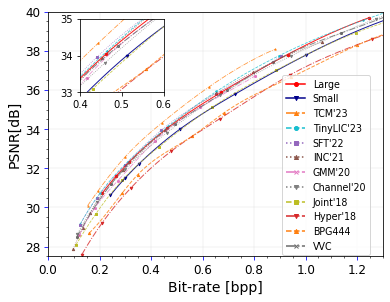

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
import numpy as np
from scipy.interpolate import make_interp_spline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

matplotlib.rcParams['font.family'] = 'Times New Roman'

def plot_multiple_csv(file_settings, output_filename):
    """
    绘制多个CSV文件数据的折线图。

    参数:
    file_settings: 一个字典列表，每个字典包含 'path', 'linestyle' 和 'color' 键。
                   'path' 是CSV文件的路径，'linestyle' 和 'color' 分别是线型和颜色。
    """

    # 创建一个图形和轴对象
    fig, ax = plt.subplots(figsize=(6, 4.5))
    # axins = inset_axes(ax, width="30%", height="30%", loc=0.5)
    axins = inset_axes(ax, width="25%", height="30%", loc=3,
                   bbox_to_anchor=(0.08, 0.65, 1, 1),
                   bbox_transform=ax.transAxes)

    for setting in file_settings:
        # 读取数据
        data = pd.read_csv(setting['path'])

        # 获取文件名作为图例标签
        legend_label = os.path.basename(setting['path']).split('.')[0]
        
        # 三次样条插值
        spline = make_interp_spline(data['x'], data['y'], k=3)
        xnew = np.linspace(data['x'].min(), data['x'].max(), 300)
        ynew = spline(xnew)

        # 绘制原始数据点
        ax.scatter(data['x'], data['y'], marker=setting['marker'], color=setting['color'], s=setting['label_size'], alpha=1)

        # 在轴上绘制每个文件的数据
        ax.plot(xnew, ynew, label=legend_label, linestyle=setting['linestyle'], color=setting['color'], linewidth=setting['linewidth'], alpha=setting['alpha'])   

        # 在局部放大图上绘制每个文件的数据
        axins.scatter(data['x'], data['y'], marker=setting['marker'], color=setting['color'], s=setting['label_size'], alpha=1)
        axins.plot(xnew, ynew, label=legend_label, linestyle=setting['linestyle'], color=setting['color'], linewidth=setting['linewidth'], alpha=setting['alpha'])     
    
    # 添加图例  
    # ax.legend(loc=(0.72, 0.05), fontsize=8, framealpha=0.5)
    #########自定义图例##########
        # 添加图例
    # 首先获取线和标记的handles和labels
    lines, labels = ax.get_lines(), [l.get_label() for l in ax.get_lines()]
    markers, _ = ax.collections, [l.get_label() for l in ax.collections]
    
    # 由于我们需要线和标记在图例中一起显示，我们需要创建一个新的handles列表
    # 它包含了线和对应的标记
    handles = []

    for setting, line, marker in zip(file_settings, lines, markers):
        line_marker = plt.Line2D([], [], color=line.get_color(), marker=marker.get_paths()[0], linestyle=line.get_linestyle(),  markersize=setting['legend_marker_size'])
        handles.append(line_marker)
        
    
    # 使用新的handles创建图例
    ax.legend(handles=handles, labels=labels, loc=(0.70, 0.005), fontsize=9.5, framealpha=0.8)

    # # 获取handles和labels并重新排序
    # handles, labels = ax.get_legend_handles_labels()
    # order = [1, 0]  # 定义新的排序

    # # 使用重新排序的handles和labels创建图例
    # ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order])

    # 设置网格线
    # ax.grid(True, linewidth=0.4)
    ax.grid(which='major', linestyle='-', linewidth=0.3, color='lightgray')
    # ax.yaxis.grid(which='minor', linestyle='-', linewidth=0.2, color='lightgray')
   

    # 设置X轴和Y轴的范围
    ax.set_xlim([0, 1.3])
    ax.set_ylim([27.5, 40])

    # 设置局部放大图的范围
    x1, x2, y1, y2 = 0.4, 0.6, 33, 35 
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)

    # 添加坐标轴标题
    ax.set_xlabel('Bit-rate [bpp]', fontsize=14)
    ax.set_ylabel('PSNR[dB]', fontsize=14) 
    ax.tick_params(axis='x', labelsize=12)  # X轴刻度标签大小
    ax.tick_params(axis='y', labelsize=12)  # Y轴刻度标签大小

    # 设置坐标轴刻度
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
    
    ax.tick_params(which='minor', length=2, color='black')
    ax.tick_params(which='major', length=4, color='blue')

    # 保存图表为矢量图
    plt.savefig(output_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)

    # 显示图表
    plt.show()

# 使用示例
csv_files_settings = [
    {'path': "../data/kodak/Large.csv", 'linestyle': '-', 'color': 'r', 'marker': 'o', 'alpha': 0.9, 'label_size': 6, 'linewidth': 1, 'legend_marker_size': 4},
    {'path': "../data/kodak/Small.csv", 'linestyle': '-', 'color': 'darkblue', 'marker': 'v', 'alpha': 0.9, 'label_size': 6, 'linewidth': 1, 'legend_marker_size': 4}, 

    {'path': "../data/kodak/TCM'23.csv", 'linestyle': '-.', 'color': (1.0, 0.49803922,0.05490196, 1.0), 'marker': '^', 'alpha': 0.8, 'label_size': 2, 'linewidth': 0.8, 'legend_marker_size': 4},
    {'path': "../data/kodak/TinyLIC'23.csv", 'linestyle': '--', 'color': (0.09019608,0.74509804, 0.81176471,1.0), 'marker': 'o', 'alpha': 0.8, 'label_size': 2, 'linewidth': 0.8, 'legend_marker_size': 4},
    {'path': "../data/kodak/SFT'22.csv", 'linestyle': ':', 'color': (0.58039216, 0.40392157, 0.74117647,1.0), 'marker': 's', 'alpha': 0.8, 'label_size': 2, 'linewidth': 0.8, 'legend_marker_size': 4},
    # {'path': "./data/kodak-mse/NMLT'22.csv", 'linestyle': '--', 'color': (0.58039216, 0.40392157, 0.74117647,1.0), 'marker': 'v', 'alpha': 0.8, 'label_size': 5, 'linewidth': 1, 'legend_marker_size': 4},
    {'path': "../data/kodak/INC'21.csv", 'linestyle': ':', 'color': (0.54901961, 0.3372549 , 0.29411765,1.0), 'marker': '^', 'alpha': 0.8, 'label_size': 5, 'linewidth': 0.8, 'legend_marker_size': 4},
    {'path': "../data/kodak//GMM'20.csv", 'linestyle': '-.', 'color': (0.89019608, 0.46666667, 0.76078431,1.0), 'marker': 'x', 'alpha': 0.8, 'label_size': 5, 'linewidth': 0.8, 'legend_marker_size': 4},
    {'path': "../data/kodak/Channel'20.csv", 'linestyle': ':', 'color': (0.49803922, 0.49803922, 0.49803922,1.0), 'marker':'v', 'alpha': 0.8, 'label_size': 5, 'linewidth': 0.8, 'legend_marker_size': 4},
    {'path': "../data/kodak/Joint'18.csv", 'linestyle': '--', 'color': (0.7372549, 0.74117647, 0.13333333,1.0), 'marker': 's', 'alpha': 0.8, 'label_size': 5, 'linewidth': 0.8, 'legend_marker_size': 4},
    {'path': "../data/kodak/Hyper'18.csv", 'linestyle': '-.', 'color': (0.83921569, 0.15294118, 0.15686275,1.0), 'marker': 'v', 'alpha': 0.8, 'label_size': 6, 'linewidth': 1, 'legend_marker_size': 4},
    {'path': "../data/kodak/BPG444.csv", 'linestyle': '--', 'color': (1.0, 0.49803922,0.05490196, 1.0), 'marker': '^', 'alpha': 0.8, 'label_size': 5, 'linewidth': 1, 'legend_marker_size': 4},     
    {'path': "../data/kodak/VVC.csv", 'linestyle': '-.', 'color': 'dimgray', 'marker': 'x', 'alpha': 0.8, 'label_size': 5, 'linewidth': 1, 'legend_marker_size': 4},
     
]
 

# linestyles = ['-', '--', '-.']
# markers = ['o', 's', 'v', '^', '*']
# markers = ['None', 's']

for i, setting in enumerate(csv_files_settings):
    # color = plt.cm.tab10(i % 10)  # tab10 colormap有10种颜色
    # linestyle = linestyles[i % len(linestyles)]  # 循环使用定义的线形
    # marker = markers[i % len(markers)]  # 循环使用定义的标记
    # setting['color'] = color
    # setting['linestyle'] = linestyle
    # setting['marker'] = marker
    print(f"配置 {i}: 路径={setting['path']}, 颜色={setting['color']}, 线形={setting['linestyle']}, 标记={setting['marker']}, 透明度={setting['alpha']}")

plot_multiple_csv(csv_files_settings, '../out_figure/kodak-mse.pdf')


配置 0: 路径=../data/clic/Large.csv, 颜色=r, 线形=-, 标记=o, 透明度=0.9
配置 1: 路径=../data/clic/Small.csv, 颜色=darkblue, 线形=-, 标记=v, 透明度=0.9
配置 2: 路径=../data/clic/TCM'23.csv, 颜色=(1.0, 0.49803922, 0.05490196, 1.0), 线形=-., 标记=^, 透明度=0.8
配置 3: 路径=../data/clic/TinyLIC'23.csv, 颜色=(0.09019608, 0.74509804, 0.81176471, 1.0), 线形=--, 标记=o, 透明度=0.8
配置 4: 路径=../data/clic/SFT'22.csv, 颜色=(0.58039216, 0.40392157, 0.74117647, 1.0), 线形=:, 标记=s, 透明度=0.8
配置 5: 路径=../data/clic/INC'21.csv, 颜色=(0.54901961, 0.3372549, 0.29411765, 1.0), 线形=:, 标记=^, 透明度=0.8
配置 6: 路径=../data/clic//GMM'20.csv, 颜色=(0.89019608, 0.46666667, 0.76078431, 1.0), 线形=-., 标记=x, 透明度=0.8
配置 7: 路径=../data/clic/Channel'20.csv, 颜色=(0.49803922, 0.49803922, 0.49803922, 1.0), 线形=:, 标记=v, 透明度=0.8
配置 8: 路径=../data/clic/Joint'18.csv, 颜色=(0.7372549, 0.74117647, 0.13333333, 1.0), 线形=--, 标记=s, 透明度=0.8
配置 9: 路径=../data/clic/Hyper'18.csv, 颜色=(0.83921569, 0.15294118, 0.15686275, 1.0), 线形=-., 标记=v, 透明度=0.8
配置 10: 路径=../data/clic/BPG444.csv, 颜色=(1.0, 0.49803922, 0.05490196

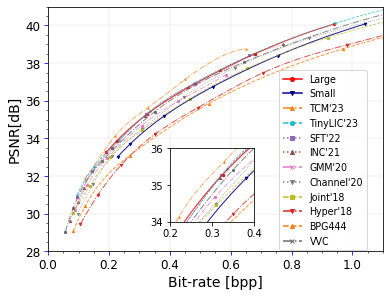

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
import numpy as np
from scipy.interpolate import make_interp_spline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

matplotlib.rcParams['font.family'] = 'Times New Roman'

def plot_multiple_csv(file_settings, output_filename):
    """
    绘制多个CSV文件数据的折线图。

    参数:
    file_settings: 一个字典列表，每个字典包含 'path', 'linestyle' 和 'color' 键。
                   'path' 是CSV文件的路径，'linestyle' 和 'color' 分别是线型和颜色。
    """

    # 创建一个图形和轴对象
    fig, ax = plt.subplots(figsize=(6, 4.5))
    # axins = inset_axes(ax, width="30%", height="30%", loc=0.5)
    axins = inset_axes(ax, width="25%", height="30%", loc=3,
                   bbox_to_anchor=(0.35, 0.10, 1, 1),
                   bbox_transform=ax.transAxes)

    for setting in file_settings:
        # 读取数据
        data = pd.read_csv(setting['path'])

        # 获取文件名作为图例标签
        legend_label = os.path.basename(setting['path']).split('.')[0]
        
        # 三次样条插值
        spline = make_interp_spline(data['x'], data['y'], k=3)
        xnew = np.linspace(data['x'].min(), data['x'].max(), 300)
        ynew = spline(xnew)

        # 绘制原始数据点
        ax.scatter(data['x'], data['y'], marker=setting['marker'], color=setting['color'], s=setting['label_size'], alpha=1)

        # 在轴上绘制每个文件的数据
        ax.plot(xnew, ynew, label=legend_label, linestyle=setting['linestyle'], color=setting['color'], linewidth=setting['linewidth'], alpha=setting['alpha'])   

        # 在局部放大图上绘制每个文件的数据
        axins.scatter(data['x'], data['y'], marker=setting['marker'], color=setting['color'], s=setting['label_size'], alpha=1)
        axins.plot(xnew, ynew, label=legend_label, linestyle=setting['linestyle'], color=setting['color'], linewidth=setting['linewidth'], alpha=setting['alpha'])     
    
    # 添加图例  
    # ax.legend(loc=(0.72, 0.05), fontsize=8, framealpha=0.5)
    #########自定义图例##########
        # 添加图例
    # 首先获取线和标记的handles和labels
    lines, labels = ax.get_lines(), [l.get_label() for l in ax.get_lines()]
    markers, _ = ax.collections, [l.get_label() for l in ax.collections]
    
    # 由于我们需要线和标记在图例中一起显示，我们需要创建一个新的handles列表
    # 它包含了线和对应的标记
    handles = []

    for setting, line, marker in zip(file_settings, lines, markers):
        line_marker = plt.Line2D([], [], color=line.get_color(), marker=marker.get_paths()[0], linestyle=line.get_linestyle(),  markersize=setting['legend_marker_size'])
        handles.append(line_marker)
        
    
    # 使用新的handles创建图例
    ax.legend(handles=handles, labels=labels, loc=(0.69, 0.005), fontsize=9.5, framealpha=0.8)

    # # 获取handles和labels并重新排序
    # handles, labels = ax.get_legend_handles_labels()
    # order = [1, 0]  # 定义新的排序

    # # 使用重新排序的handles和labels创建图例
    # ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order])

    # 设置网格线
    # ax.grid(True, linewidth=0.4)
    ax.grid(which='major', linestyle='-', linewidth=0.3, color='lightgray')
    # ax.yaxis.grid(which='minor', linestyle='-', linewidth=0.2, color='lightgray')
   

    # 设置X轴和Y轴的范围
    ax.set_xlim([0, 1.1])
    ax.set_ylim([28, 41])

    # 设置局部放大图的范围
    x1, x2, y1, y2 = 0.2, 0.4, 34, 36 
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)

    # 添加坐标轴标题
    ax.set_xlabel('Bit-rate [bpp]', fontsize=14)
    ax.set_ylabel('PSNR[dB]', fontsize=14) 
    ax.tick_params(axis='x', labelsize=12)  # X轴刻度标签大小
    ax.tick_params(axis='y', labelsize=12)  # Y轴刻度标签大小

    # 设置坐标轴刻度
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
    
    ax.tick_params(which='minor', length=2, color='black')
    ax.tick_params(which='major', length=4, color='blue')

    # 保存图表为矢量图
    plt.savefig(output_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)

    # 显示图表
    plt.show()

# 使用示例
csv_files_settings = [
    {'path': "../data/clic/Large.csv", 'linestyle': '-', 'color': 'r', 'marker': 'o', 'alpha': 0.9, 'label_size': 6, 'linewidth': 1, 'legend_marker_size': 4},
    {'path': "../data/clic/Small.csv", 'linestyle': '-', 'color': 'darkblue', 'marker': 'v', 'alpha': 0.9, 'label_size': 6, 'linewidth': 1, 'legend_marker_size': 4}, 

    {'path': "../data/clic/TCM'23.csv", 'linestyle': '-.', 'color': (1.0, 0.49803922,0.05490196, 1.0), 'marker': '^', 'alpha': 0.8, 'label_size': 2, 'linewidth': 0.8, 'legend_marker_size': 4},
    {'path': "../data/clic/TinyLIC'23.csv", 'linestyle': '--', 'color': (0.09019608,0.74509804, 0.81176471,1.0), 'marker': 'o', 'alpha': 0.8, 'label_size': 2, 'linewidth': 0.8, 'legend_marker_size': 4},
    {'path': "../data/clic/SFT'22.csv", 'linestyle': ':', 'color': (0.58039216, 0.40392157, 0.74117647,1.0), 'marker': 's', 'alpha': 0.8, 'label_size': 2, 'linewidth': 0.8, 'legend_marker_size': 4},
    # {'path': "./data/kodak-mse/NMLT'22.csv", 'linestyle': '--', 'color': (0.58039216, 0.40392157, 0.74117647,1.0), 'marker': 'v', 'alpha': 0.8, 'label_size': 5, 'linewidth': 1, 'legend_marker_size': 4},
    {'path': "../data/clic/INC'21.csv", 'linestyle': ':', 'color': (0.54901961, 0.3372549 , 0.29411765,1.0), 'marker': '^', 'alpha': 0.8, 'label_size': 5, 'linewidth': 0.8, 'legend_marker_size': 4},
    {'path': "../data/clic//GMM'20.csv", 'linestyle': '-.', 'color': (0.89019608, 0.46666667, 0.76078431,1.0), 'marker': 'x', 'alpha': 0.8, 'label_size': 5, 'linewidth': 0.8, 'legend_marker_size': 4},
    {'path': "../data/clic/Channel'20.csv", 'linestyle': ':', 'color': (0.49803922, 0.49803922, 0.49803922,1.0), 'marker':'v', 'alpha': 0.8, 'label_size': 5, 'linewidth': 0.8, 'legend_marker_size': 4},
    {'path': "../data/clic/Joint'18.csv", 'linestyle': '--', 'color': (0.7372549, 0.74117647, 0.13333333,1.0), 'marker': 's', 'alpha': 0.8, 'label_size': 5, 'linewidth': 0.8, 'legend_marker_size': 4},
    {'path': "../data/clic/Hyper'18.csv", 'linestyle': '-.', 'color': (0.83921569, 0.15294118, 0.15686275,1.0), 'marker': 'v', 'alpha': 0.8, 'label_size': 6, 'linewidth': 1, 'legend_marker_size': 4},
    {'path': "../data/clic/BPG444.csv", 'linestyle': '--', 'color': (1.0, 0.49803922,0.05490196, 1.0), 'marker': '^', 'alpha': 0.8, 'label_size': 5, 'linewidth': 1, 'legend_marker_size': 4},     
    {'path': "../data/clic/VVC.csv", 'linestyle': '-.', 'color': 'dimgray', 'marker': 'x', 'alpha': 0.8, 'label_size': 5, 'linewidth': 1, 'legend_marker_size': 4},
     
]
 

# linestyles = ['-', '--', '-.']
# markers = ['o', 's', 'v', '^', '*']
# markers = ['None', 's']

for i, setting in enumerate(csv_files_settings):
    # color = plt.cm.tab10(i % 10)  # tab10 colormap有10种颜色
    # linestyle = linestyles[i % len(linestyles)]  # 循环使用定义的线形
    # marker = markers[i % len(markers)]  # 循环使用定义的标记
    # setting['color'] = color
    # setting['linestyle'] = linestyle
    # setting['marker'] = marker
    print(f"配置 {i}: 路径={setting['path']}, 颜色={setting['color']}, 线形={setting['linestyle']}, 标记={setting['marker']}, 透明度={setting['alpha']}")

plot_multiple_csv(csv_files_settings, '../out_figure/CLIC-mse.pdf')


配置 0: 路径=../data/jpegai/Large.csv, 颜色=r, 线形=-, 标记=o, 透明度=0.9
配置 1: 路径=../data/jpegai/Small.csv, 颜色=darkblue, 线形=-, 标记=v, 透明度=0.9
配置 2: 路径=../data/jpegai/TCM'23.csv, 颜色=(1.0, 0.49803922, 0.05490196, 1.0), 线形=-., 标记=^, 透明度=0.8
配置 3: 路径=../data/jpegai/TinyLIC'23.csv, 颜色=(0.09019608, 0.74509804, 0.81176471, 1.0), 线形=--, 标记=o, 透明度=0.8
配置 4: 路径=../data/jpegai/SFT'22.csv, 颜色=(0.58039216, 0.40392157, 0.74117647, 1.0), 线形=:, 标记=s, 透明度=0.8
配置 5: 路径=../data/jpegai/INC'21.csv, 颜色=(0.54901961, 0.3372549, 0.29411765, 1.0), 线形=:, 标记=^, 透明度=0.8
配置 6: 路径=../data/jpegai/GMM'20.csv, 颜色=(0.89019608, 0.46666667, 0.76078431, 1.0), 线形=-., 标记=x, 透明度=0.8
配置 7: 路径=../data/jpegai/Joint'18.csv, 颜色=(0.7372549, 0.74117647, 0.13333333, 1.0), 线形=--, 标记=s, 透明度=0.8
配置 8: 路径=../data/jpegai/Hyper'18.csv, 颜色=(0.83921569, 0.15294118, 0.15686275, 1.0), 线形=-., 标记=v, 透明度=0.8
配置 9: 路径=../data/jpegai/BPG444.csv, 颜色=(1.0, 0.49803922, 0.05490196, 1.0), 线形=--, 标记=^, 透明度=0.8
配置 10: 路径=../data/jpegai/VVC.csv, 颜色=dimgray, 线形=-., 标记=x

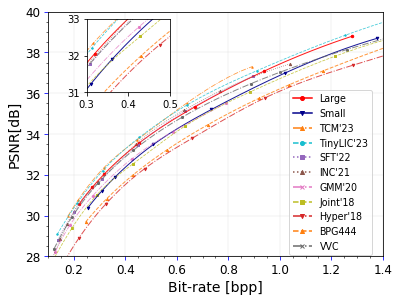

In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
import numpy as np
from scipy.interpolate import make_interp_spline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

matplotlib.rcParams['font.family'] = 'Times New Roman'

def plot_multiple_csv(file_settings, output_filename):
    """
    绘制多个CSV文件数据的折线图。

    参数:
    file_settings: 一个字典列表，每个字典包含 'path', 'linestyle' 和 'color' 键。
                   'path' 是CSV文件的路径，'linestyle' 和 'color' 分别是线型和颜色。
    """

    # 创建一个图形和轴对象
    fig, ax = plt.subplots(figsize=(6, 4.5))
    # axins = inset_axes(ax, width="30%", height="30%", loc=0.5)
    axins = inset_axes(ax, width="25%", height="30%", loc=3,
                   bbox_to_anchor=(0.10, 0.65, 1, 1),
                   bbox_transform=ax.transAxes)

    for setting in file_settings:
        # 读取数据
        data = pd.read_csv(setting['path'])

        # 获取文件名作为图例标签
        legend_label = os.path.basename(setting['path']).split('.')[0]
        
        # 三次样条插值
        spline = make_interp_spline(data['x'], data['y'], k=3)
        xnew = np.linspace(data['x'].min(), data['x'].max(), 300)
        ynew = spline(xnew)

        # 绘制原始数据点
        ax.scatter(data['x'], data['y'], marker=setting['marker'], color=setting['color'], s=setting['label_size'], alpha=1)

        # 在轴上绘制每个文件的数据
        ax.plot(xnew, ynew, label=legend_label, linestyle=setting['linestyle'], color=setting['color'], linewidth=setting['linewidth'], alpha=setting['alpha'])   

        # 在局部放大图上绘制每个文件的数据
        axins.scatter(data['x'], data['y'], marker=setting['marker'], color=setting['color'], s=setting['label_size'], alpha=1)
        axins.plot(xnew, ynew, label=legend_label, linestyle=setting['linestyle'], color=setting['color'], linewidth=setting['linewidth'], alpha=setting['alpha'])     
    
    # 添加图例  
    # ax.legend(loc=(0.72, 0.05), fontsize=8, framealpha=0.5)
    #########自定义图例##########
        # 添加图例
    # 首先获取线和标记的handles和labels
    lines, labels = ax.get_lines(), [l.get_label() for l in ax.get_lines()]
    markers, _ = ax.collections, [l.get_label() for l in ax.collections]
    
    # 由于我们需要线和标记在图例中一起显示，我们需要创建一个新的handles列表
    # 它包含了线和对应的标记
    handles = []

    for setting, line, marker in zip(file_settings, lines, markers):
        line_marker = plt.Line2D([], [], color=line.get_color(), marker=marker.get_paths()[0], linestyle=line.get_linestyle(),  markersize=setting['legend_marker_size'])
        handles.append(line_marker)
        
    
    # 使用新的handles创建图例
    ax.legend(handles=handles, labels=labels, loc=(0.72, 0.005), fontsize=9.5, framealpha=0.8)

    # # 获取handles和labels并重新排序
    # handles, labels = ax.get_legend_handles_labels()
    # order = [1, 0]  # 定义新的排序

    # # 使用重新排序的handles和labels创建图例
    # ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order])

    # 设置网格线
    # ax.grid(True, linewidth=0.4)
    ax.grid(which='major', linestyle='-', linewidth=0.3, color='lightgray')
    # ax.yaxis.grid(which='minor', linestyle='-', linewidth=0.2, color='lightgray')
   

    # 设置X轴和Y轴的范围
    ax.set_xlim([0.1, 1.4])
    ax.set_ylim([28, 40])

    # 设置局部放大图的范围
    x1, x2, y1, y2 = 0.3, 0.5, 31, 33 
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)

    # 添加坐标轴标题
    ax.set_xlabel('Bit-rate [bpp]', fontsize=14)
    ax.set_ylabel('PSNR[dB]', fontsize=14) 
    ax.tick_params(axis='x', labelsize=12)  # X轴刻度标签大小
    ax.tick_params(axis='y', labelsize=12)  # Y轴刻度标签大小

    # 设置坐标轴刻度
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
    
    ax.tick_params(which='minor', length=2, color='black')
    ax.tick_params(which='major', length=4, color='blue')

    # 保存图表为矢量图
    plt.savefig(output_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)

    # 显示图表
    plt.show()

# 使用示例
csv_files_settings = [
    {'path': "../data/jpegai/Large.csv", 'linestyle': '-', 'color': 'r', 'marker': 'o', 'alpha': 0.9, 'label_size': 6, 'linewidth': 1, 'legend_marker_size': 4},
    {'path': "../data/jpegai/Small.csv", 'linestyle': '-', 'color': 'darkblue', 'marker': 'v', 'alpha': 0.9, 'label_size': 6, 'linewidth': 1, 'legend_marker_size': 4}, 

    {'path': "../data/jpegai/TCM'23.csv", 'linestyle': '-.', 'color': (1.0, 0.49803922,0.05490196, 1.0), 'marker': '^', 'alpha': 0.8, 'label_size': 2, 'linewidth': 0.8, 'legend_marker_size': 4},
    {'path': "../data/jpegai/TinyLIC'23.csv", 'linestyle': '--', 'color': (0.09019608,0.74509804, 0.81176471,1.0), 'marker': 'o', 'alpha': 0.8, 'label_size': 2, 'linewidth': 0.8, 'legend_marker_size': 4},
    {'path': "../data/jpegai/SFT'22.csv", 'linestyle': ':', 'color': (0.58039216, 0.40392157, 0.74117647,1.0), 'marker': 's', 'alpha': 0.8, 'label_size': 2, 'linewidth': 0.8, 'legend_marker_size': 4},
    # {'path': "./data/kodak-mse/NMLT'22.csv", 'linestyle': '--', 'color': (0.58039216, 0.40392157, 0.74117647,1.0), 'marker': 'v', 'alpha': 0.8, 'label_size': 5, 'linewidth': 1, 'legend_marker_size': 4},
    {'path': "../data/jpegai/INC'21.csv", 'linestyle': ':', 'color': (0.54901961, 0.3372549 , 0.29411765,1.0), 'marker': '^', 'alpha': 0.8, 'label_size': 5, 'linewidth': 0.8, 'legend_marker_size': 4},
    {'path': "../data/jpegai/GMM'20.csv", 'linestyle': '-.', 'color': (0.89019608, 0.46666667, 0.76078431,1.0), 'marker': 'x', 'alpha': 0.8, 'label_size': 5, 'linewidth': 0.8, 'legend_marker_size': 4},
    {'path': "../data/jpegai/Joint'18.csv", 'linestyle': '--', 'color': (0.7372549, 0.74117647, 0.13333333,1.0), 'marker': 's', 'alpha': 0.8, 'label_size': 5, 'linewidth': 0.8, 'legend_marker_size': 4},
    {'path': "../data/jpegai/Hyper'18.csv", 'linestyle': '-.', 'color': (0.83921569, 0.15294118, 0.15686275,1.0), 'marker': 'v', 'alpha': 0.8, 'label_size': 6, 'linewidth': 1, 'legend_marker_size': 4},
    {'path': "../data/jpegai/BPG444.csv", 'linestyle': '--', 'color': (1.0, 0.49803922,0.05490196, 1.0), 'marker': '^', 'alpha': 0.8, 'label_size': 5, 'linewidth': 1, 'legend_marker_size': 4},     
    {'path': "../data/jpegai/VVC.csv", 'linestyle': '-.', 'color': 'dimgray', 'marker': 'x', 'alpha': 0.8, 'label_size': 5, 'linewidth': 1, 'legend_marker_size': 4},
     
]
 

# linestyles = ['-', '--', '-.']
# markers = ['o', 's', 'v', '^', '*']
# markers = ['None', 's']

for i, setting in enumerate(csv_files_settings):
    # color = plt.cm.tab10(i % 10)  # tab10 colormap有10种颜色
    # linestyle = linestyles[i % len(linestyles)]  # 循环使用定义的线形
    # marker = markers[i % len(markers)]  # 循环使用定义的标记
    # setting['color'] = color
    # setting['linestyle'] = linestyle
    # setting['marker'] = marker
    print(f"配置 {i}: 路径={setting['path']}, 颜色={setting['color']}, 线形={setting['linestyle']}, 标记={setting['marker']}, 透明度={setting['alpha']}")

plot_multiple_csv(csv_files_settings, '../out_figure/JPEGAI-mse.pdf')


配置 0: 路径=../data/tecnick/Large.csv, 颜色=r, 线形=-, 标记=o, 透明度=0.9
配置 1: 路径=../data/tecnick/Small.csv, 颜色=darkblue, 线形=-, 标记=v, 透明度=0.9
配置 2: 路径=../data/tecnick/TCM'23.csv, 颜色=(1.0, 0.49803922, 0.05490196, 1.0), 线形=-., 标记=^, 透明度=0.8
配置 3: 路径=../data/tecnick/TinyLIC'23.csv, 颜色=(0.09019608, 0.74509804, 0.81176471, 1.0), 线形=--, 标记=o, 透明度=0.8
配置 4: 路径=../data/tecnick/SFT'22.csv, 颜色=(0.58039216, 0.40392157, 0.74117647, 1.0), 线形=:, 标记=s, 透明度=0.8
配置 5: 路径=../data/tecnick/INC'21.csv, 颜色=(0.54901961, 0.3372549, 0.29411765, 1.0), 线形=:, 标记=^, 透明度=0.8
配置 6: 路径=../data/tecnick//GMM'20.csv, 颜色=(0.89019608, 0.46666667, 0.76078431, 1.0), 线形=-., 标记=x, 透明度=0.8
配置 7: 路径=../data/tecnick/Joint'18.csv, 颜色=(0.7372549, 0.74117647, 0.13333333, 1.0), 线形=--, 标记=s, 透明度=0.8
配置 8: 路径=../data/tecnick/Hyper'18.csv, 颜色=(0.83921569, 0.15294118, 0.15686275, 1.0), 线形=-., 标记=v, 透明度=0.8
配置 9: 路径=../data/tecnick/BPG444.csv, 颜色=(1.0, 0.49803922, 0.05490196, 1.0), 线形=--, 标记=^, 透明度=0.8
配置 10: 路径=../data/tecnick/VVC.csv, 颜色=dimgray,

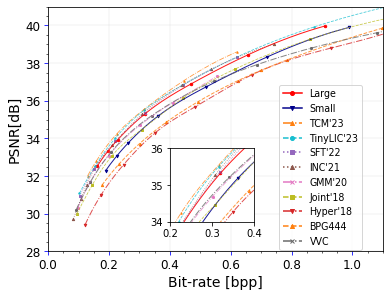

In [4]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
import numpy as np
from scipy.interpolate import make_interp_spline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

matplotlib.rcParams['font.family'] = 'Times New Roman'

def plot_multiple_csv(file_settings, output_filename):
    """
    绘制多个CSV文件数据的折线图。

    参数:
    file_settings: 一个字典列表，每个字典包含 'path', 'linestyle' 和 'color' 键。
                   'path' 是CSV文件的路径，'linestyle' 和 'color' 分别是线型和颜色。
    """

    # 创建一个图形和轴对象
    fig, ax = plt.subplots(figsize=(6, 4.5))
    # axins = inset_axes(ax, width="30%", height="30%", loc=0.5)
    axins = inset_axes(ax, width="25%", height="30%", loc=3,
                   bbox_to_anchor=(0.35, 0.10, 1, 1),
                   bbox_transform=ax.transAxes)

    for setting in file_settings:
        # 读取数据
        data = pd.read_csv(setting['path'])

        # 获取文件名作为图例标签
        legend_label = os.path.basename(setting['path']).split('.')[0]
        
        # 三次样条插值
        spline = make_interp_spline(data['x'], data['y'], k=3)
        xnew = np.linspace(data['x'].min(), data['x'].max(), 300)
        ynew = spline(xnew)

        # 绘制原始数据点
        ax.scatter(data['x'], data['y'], marker=setting['marker'], color=setting['color'], s=setting['label_size'], alpha=1)

        # 在轴上绘制每个文件的数据
        ax.plot(xnew, ynew, label=legend_label, linestyle=setting['linestyle'], color=setting['color'], linewidth=setting['linewidth'], alpha=setting['alpha'])   

        # 在局部放大图上绘制每个文件的数据
        axins.scatter(data['x'], data['y'], marker=setting['marker'], color=setting['color'], s=setting['label_size'], alpha=1)
        axins.plot(xnew, ynew, label=legend_label, linestyle=setting['linestyle'], color=setting['color'], linewidth=setting['linewidth'], alpha=setting['alpha'])     
    
    # 添加图例  
    # ax.legend(loc=(0.72, 0.05), fontsize=8, framealpha=0.5)
    #########自定义图例##########
        # 添加图例
    # 首先获取线和标记的handles和labels
    lines, labels = ax.get_lines(), [l.get_label() for l in ax.get_lines()]
    markers, _ = ax.collections, [l.get_label() for l in ax.collections]
    
    # 由于我们需要线和标记在图例中一起显示，我们需要创建一个新的handles列表
    # 它包含了线和对应的标记
    handles = []

    for setting, line, marker in zip(file_settings, lines, markers):
        line_marker = plt.Line2D([], [], color=line.get_color(), marker=marker.get_paths()[0], linestyle=line.get_linestyle(),  markersize=setting['legend_marker_size'])
        handles.append(line_marker)
        
    
    # 使用新的handles创建图例
    ax.legend(handles=handles, labels=labels, loc=(0.69, 0.005), fontsize=9.5, framealpha=0.8)

    # # 获取handles和labels并重新排序
    # handles, labels = ax.get_legend_handles_labels()
    # order = [1, 0]  # 定义新的排序

    # # 使用重新排序的handles和labels创建图例
    # ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order])

    # 设置网格线
    # ax.grid(True, linewidth=0.4)
    ax.grid(which='major', linestyle='-', linewidth=0.3, color='lightgray')
    # ax.yaxis.grid(which='minor', linestyle='-', linewidth=0.2, color='lightgray')
   

    # 设置X轴和Y轴的范围
    ax.set_xlim([0, 1.1])
    ax.set_ylim([28, 41])

    # 设置局部放大图的范围
    x1, x2, y1, y2 = 0.2, 0.4, 34, 36 
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)

    # 添加坐标轴标题
    ax.set_xlabel('Bit-rate [bpp]', fontsize=14)
    ax.set_ylabel('PSNR[dB]', fontsize=14) 
    ax.tick_params(axis='x', labelsize=12)  # X轴刻度标签大小
    ax.tick_params(axis='y', labelsize=12)  # Y轴刻度标签大小

    # 设置坐标轴刻度
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
    
    ax.tick_params(which='minor', length=2, color='black')
    ax.tick_params(which='major', length=4, color='blue')

    # 保存图表为矢量图
    plt.savefig(output_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)

    # 显示图表
    plt.show()

# 使用示例
csv_files_settings = [
    {'path': "../data/tecnick/Large.csv", 'linestyle': '-', 'color': 'r', 'marker': 'o', 'alpha': 0.9, 'label_size': 6, 'linewidth': 1, 'legend_marker_size': 4},
    # {'path': "../data/tecnick/Medium.csv", 'linestyle': '-', 'color': 'b', 'marker': 'o', 'alpha': 0.9, 'label_size': 6, 'linewidth': 1, 'legend_marker_size': 4},
    {'path': "../data/tecnick/Small.csv", 'linestyle': '-', 'color': 'darkblue', 'marker': 'v', 'alpha': 0.9, 'label_size': 6, 'linewidth': 1, 'legend_marker_size': 4}, 

    {'path': "../data/tecnick/TCM'23.csv", 'linestyle': '-.', 'color': (1.0, 0.49803922,0.05490196, 1.0), 'marker': '^', 'alpha': 0.8, 'label_size': 2, 'linewidth': 0.8, 'legend_marker_size': 4},
    {'path': "../data/tecnick/TinyLIC'23.csv", 'linestyle': '--', 'color': (0.09019608,0.74509804, 0.81176471,1.0), 'marker': 'o', 'alpha': 0.8, 'label_size': 2, 'linewidth': 0.8, 'legend_marker_size': 4},
    {'path': "../data/tecnick/SFT'22.csv", 'linestyle': ':', 'color': (0.58039216, 0.40392157, 0.74117647,1.0), 'marker': 's', 'alpha': 0.8, 'label_size': 2, 'linewidth': 0.8, 'legend_marker_size': 4},
    # {'path': "./data/kodak-mse/NMLT'22.csv", 'linestyle': '--', 'color': (0.58039216, 0.40392157, 0.74117647,1.0), 'marker': 'v', 'alpha': 0.8, 'label_size': 5, 'linewidth': 1, 'legend_marker_size': 4},
    {'path': "../data/tecnick/INC'21.csv", 'linestyle': ':', 'color': (0.54901961, 0.3372549 , 0.29411765,1.0), 'marker': '^', 'alpha': 0.8, 'label_size': 5, 'linewidth': 0.8, 'legend_marker_size': 4},
    {'path': "../data/tecnick//GMM'20.csv", 'linestyle': '-.', 'color': (0.89019608, 0.46666667, 0.76078431,1.0), 'marker': 'x', 'alpha': 0.8, 'label_size': 5, 'linewidth': 0.8, 'legend_marker_size': 4},

    {'path': "../data/tecnick/Joint'18.csv", 'linestyle': '--', 'color': (0.7372549, 0.74117647, 0.13333333,1.0), 'marker': 's', 'alpha': 0.8, 'label_size': 5, 'linewidth': 0.8, 'legend_marker_size': 4},
    {'path': "../data/tecnick/Hyper'18.csv", 'linestyle': '-.', 'color': (0.83921569, 0.15294118, 0.15686275,1.0), 'marker': 'v', 'alpha': 0.8, 'label_size': 6, 'linewidth': 1, 'legend_marker_size': 4},
    {'path': "../data/tecnick/BPG444.csv", 'linestyle': '--', 'color': (1.0, 0.49803922,0.05490196, 1.0), 'marker': '^', 'alpha': 0.8, 'label_size': 5, 'linewidth': 1, 'legend_marker_size': 4},     
    {'path': "../data/tecnick/VVC.csv", 'linestyle': '-.', 'color': 'dimgray', 'marker': 'x', 'alpha': 0.8, 'label_size': 5, 'linewidth': 1, 'legend_marker_size': 4},
     
]
 

# linestyles = ['-', '--', '-.']
# markers = ['o', 's', 'v', '^', '*']
# markers = ['None', 's']

for i, setting in enumerate(csv_files_settings):
    # color = plt.cm.tab10(i % 10)  # tab10 colormap有10种颜色
    # linestyle = linestyles[i % len(linestyles)]  # 循环使用定义的线形
    # marker = markers[i % len(markers)]  # 循环使用定义的标记
    # setting['color'] = color
    # setting['linestyle'] = linestyle
    # setting['marker'] = marker
    print(f"配置 {i}: 路径={setting['path']}, 颜色={setting['color']}, 线形={setting['linestyle']}, 标记={setting['marker']}, 透明度={setting['alpha']}")

plot_multiple_csv(csv_files_settings, '../out_figure/Tecknick-mse.pdf')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data points with their (x, y) coordinates, labels, and sizes for bubbles

data_points = [
    {"x": 150, "y": -5, "name": "Hyperprior", "Para": 5, "color": "pink", "alpha": 0.7},
    {"x": 300, "y": -15, "name": "CHAR", "Para": 15, "color": "red", "alpha": 0.7},
    {"x": 350, "y": -20, "name": "EVC", "Para": 15, "color": "purple", "alpha": 0.7},
    {"x": 400, "y": -25, "name": "ELIC", "Para": 15, "color": "brown", "alpha": 0.7},
    {"x": 20, "y": 10, "name": "Factorized", "Para": 30, "color": "yellow", "alpha": 0.7},
    {"x": 2000, "y": -25, "name": "Outlier", "Para": 10, "color": "green", "alpha": 0.7}
]

# # Create the plot
# fig, ax = plt.subplots()
# 创建两个横向的子图
fig, (ax1, ax2) = plt.subplots(1, 2)
# 隐藏两个子图之间的空间
fig.subplots_adjust(wspace=0.1)

# Define a scale factor for bubble sizes
scale_factor = 10

# Add data points
for point in data_points:
    bubble_size = point["Para"]  * scale_factor
    ax1.scatter(point["x"], point["y"], s=bubble_size, alpha=point["alpha"], color=point["color"], marker='o', linewidth=0.5)
    ax1.plot(point["x"], point["y"], marker='o', color='black', markersize=2)  # Adding a center marker


# Annotate the data points
for point in data_points:
    ax1.text(point["x"], point["y"], point["name"], fontsize=8, ha='left', va='top')
    ax1.text(point["x"], point["y"], str(point["Para"]) + 'M', fontsize=8, ha='left', va='bottom')


# 断裂标志
# kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
# ax1.plot((1, 1), (-0.05, 1.05), **kwargs)
# kwargs.update(transform=ax2.transAxes)
# ax2.plot((0, 0), (-0.05, 1.05), **kwargs)
d = .005  # 斜线长度
ax1.plot((1-d, 1+d), (-d, +d), color='k', transform=ax1.transAxes, clip_on=False)
ax2.plot((-d, +d), (-d, +d), color='k', transform=ax2.transAxes, clip_on=False)


y_value = -20
ax1.axhline(y=y_value, color='blue', linestyle='--', linewidth=0.8)
ax1.text(10, y_value, "VVC", fontsize=10, ha='left', va='bottom', color='blue')

ax1.grid(which='major', linestyle='-', linewidth=0.3, color='lightgray')

# Create legend for bubble sizes
legend_bubble_sizes = [10, 20, 40]
for size in legend_bubble_sizes:
    ax1.scatter([], [], s=size * scale_factor, color='gray', alpha=0.5, label=str(size) + 'M')
    ax1.plot([], [], marker='o', color='black', markersize=10)  # Adding a center marker

# Add the legend for bubble sizes
ax1.legend(loc='lower right', ncol=len(legend_bubble_sizes))

# 设置X轴和Y轴的范围
ax1.set_xlim([0, 500])
ax2.set_xlim(1900, 2100)  # 离群值

ax1.set_ylim([-25, 25])
ax1.invert_yaxis()

# Set the axis labels
ax1.set_xlabel('Thousand MACs per pixel (KMACs/pixel)')
ax1.set_ylabel('BD-Rate Saving (%)')

# Set the title of the plot
# ax.set_title('Comparison of Image Compression Methods')

# Remove the legend if you don't want to show the labels in the corner
# ax.legend()

plt.savefig('rd-c.pdf', dpi=300, bbox_inches='tight', pad_inches=0.05)

plt.show()



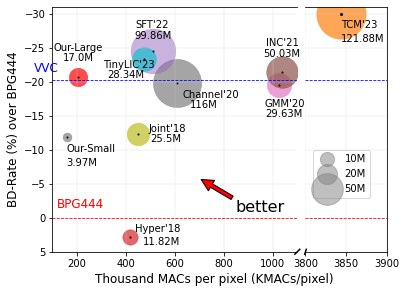

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

# Example data points with their (x, y) coordinates, labels, and sizes for bubbles
# y 负号向上，正号向下 x 负号向左，正号向右
data_points = [
    {"x": 418, "y": 2.89, "name": "Hyper'18", "Para": 11.82, "color": (0.83921569, 0.15294118, 0.15686275, 1.0), "alpha": 0.7, "para_xshift": 50, "para_yshift": 0, "M_xshift": 20, "M_yshift": -2, "ha_loc": "left", "va_loc": "top"},

    {"x": 449, "y": -12.36, "name": "Joint'18", "Para": 25.5, "color": (0.7372549, 0.74117647, 0.13333333, 1.0), "alpha": 0.7, 
    "para_xshift": 50, "para_yshift": 0, "M_xshift": 45, "M_yshift": -1.5, "ha_loc": "left", "va_loc": "top"},

    {"x": 610, "y": -19.79, "name": "Channel'20", "Para": 116, "color": (0.49803922, 0.49803922, 0.49803922, 1.0), "alpha": 0.7,
   "para_xshift": 50, "para_yshift": 2.5, "M_xshift": 20, "M_yshift": 1, "ha_loc": "left", "va_loc": "top"},

    {"x": 1027, "y": -19.48, "name": "GMM'20", "Para": 29.63, "color": (0.89019608, 0.46666667, 0.76078431, 1.0), "alpha": 0.7 ,
    "para_xshift": 20, "para_yshift": 3.5, "M_xshift": 20, "M_yshift": 2, "ha_loc": "center", "va_loc": "top"},

    {"x": 1038, "y": -21.42, "name": "INC'21", "Para": 50.03, "color": (0.54901961, 0.3372549, 0.29411765, 1.0), "alpha": 0.7 ,
    "para_xshift": 0, "para_yshift": -3.5, "M_xshift": 0, "M_yshift": -5, "ha_loc": "center", "va_loc": "top"},

    {"x": 509, "y": -24.56, "name": "SFT'22", "Para": 99.86, "color": (0.58039216, 0.40392157, 0.74117647, 1.0), "alpha": 0.5 ,
    "para_xshift": 0, "para_yshift": -3, "M_xshift": 0, "M_yshift": -4.5, "ha_loc": "center", "va_loc": "top"},

    # {"x": 833, "y": -24.52, "name": "ELIC'22", "Para": 33.79, "color": (0.17254902, 0.62745098, 0.17254902, 1.0), "alpha": 0.7 ,
    # "para_xshift": 0, "para_yshift": -2.5, "M_xshift": 0, "M_yshift": -4, "ha_loc": "center", "va_loc": "top"},

    {"x": 475.7, "y": -23.40, "name": "TinyLIC'23", "Para": 28.34, "color": (0.09019608, 0.74509804, 0.81176471, 1.0), "alpha": 0.7 ,
    "para_xshift": -150, "para_yshift": 1.7, "M_xshift": -170, "M_yshift": 0.2, "ha_loc": "left", "va_loc": "top"},

    {"x": 205.08, "y": -20.77, "name": "Our-Large", "Para": 17.0, "color": "r", "alpha": 0.7 ,
    "para_xshift": 0, "para_yshift": -3.5, "M_xshift": 0, "M_yshift": -5, "ha_loc": "center", "va_loc": "top"},

    # {"x": 173, "y": -13.12, "name": "Our-Middle", "Para": 5.79, "color": "magenta", "alpha": 0.7 ,
    # "para_xshift": 40, "para_yshift": 0, "M_xshift": 35, "M_yshift": -1.5, "ha_loc": "left", "va_loc": "top"},

    {"x": 157.93, "y": -11.82, "name": "Our-Small", "Para": 3.97, "color": "gray", "alpha": 0.7 ,
    "para_xshift": 0, "para_yshift": 3, "M_xshift": 0, "M_yshift": 1, "ha_loc": "left", "va_loc": "top"},

    {"x": 3843.68, "y": -30.05, "name": "TCM'23", "Para": 121.88, "color": (1.0, 0.49803922, 0.05490196, 1.0), "alpha": 0.7,
    "para_xshift": 0, "para_yshift": 3, "M_xshift": 0, "M_yshift": 1, "ha_loc": "left", "va_loc": "top"}
]


# # Create the plot
# fig, ax = plt.subplots()
# 创建两个横向的子图
# fig, (ax1, ax2) = plt.subplots(1, 2)
fig = plt.figure(figsize=(6, 4.5))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])  # 第一个子图是第二个子图的3倍宽

# 创建子图
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

# 隐藏两个子图之间的空间
fig.subplots_adjust(wspace=0.05)

# Define a scale factor for bubble sizes
scale_factor = 20

# Add data points
for point in data_points:
    if point["x"] <= 1100:
        bubble_size = point["Para"]  * scale_factor
        ax1.scatter(point["x"], point["y"], s=bubble_size, alpha=point["alpha"], color=point["color"], marker='o', linewidth=0.5)
        ax1.plot(point["x"], point["y"], marker='o', color='black', markersize=1)  # Adding a center marker
    else:
        bubble_size = point["Para"]  * scale_factor
        ax2.scatter(point["x"], point["y"], s=bubble_size, alpha=point["alpha"], color=point["color"], marker='o', linewidth=0.5)
        ax2.plot(point["x"], point["y"], marker='o', color='black', markersize=2)


# Annotate the data points
for point in data_points:
    if point["x"] <= 1100:
        ax1.text(point["x"] + point["M_xshift"], point["y"] + point["M_yshift"], point["name"], fontsize=10, ha=point["ha_loc"], va=point["va_loc"])
        ax1.text(point["x"] + point["para_xshift"], point["y"] + point["para_yshift"], str(point["Para"]) + 'M', fontsize=10, ha=point["ha_loc"], va=point["va_loc"])
    else:
        ax2.text(point["x"] + point["M_xshift"], point["y"] + point["M_yshift"], point["name"], fontsize=10, ha=point["ha_loc"], va=point["va_loc"])
        ax2.text(point["x"]+ point["para_xshift"], point["y"] + point["para_yshift"], str(point["Para"]) + 'M', fontsize=10, ha=point["ha_loc"], va=point["va_loc"])
    

# 断裂标志
# kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
# ax1.plot((1, 1), (-0.05, 1.05), **kwargs)
# kwargs.update(transform=ax2.transAxes)
# ax2.plot((0, 0), (-0.05, 1.05), **kwargs)
d = .010  # 斜线长度
ax1.plot((1-d, 1+d), (-d, +d), color='k', transform=ax1.transAxes, clip_on=False)
ax2.plot((-d, +d), (-d, +d), color='k', transform=ax2.transAxes, clip_on=False)


y_value = -20.22
ax1.axhline(y=y_value, color='blue', linestyle='--', linewidth=0.8)
ax1.text(25, -21 , "VVC", fontsize=12, ha='left', va='bottom', color='blue')
ax2.axhline(y=y_value, color='blue', linestyle='--', linewidth=0.8)
# ax2.text(10, y_value, "VVC", fontsize=10, ha='left', va='bottom', color='blue')


y_value = 0
ax1.axhline(y=y_value, color='red', linestyle='--', linewidth=0.8)
ax1.text(120, -1 , "BPG444", fontsize=12, ha='left', va='bottom', color='red')
ax2.axhline(y=y_value, color='red', linestyle='--', linewidth=0.8)
# ax2.text(10, y_value, "VVC", fontsize=10, ha='left', va='bottom', color='blue')

ax1.grid(which='major', linestyle='-', linewidth=0.3, color='lightgray')
ax2.grid(which='major', linestyle='-', linewidth=0.3, color='lightgray')

# Create legend for bubble sizes
legend_bubble_sizes = [10, 20, 50]
for size in legend_bubble_sizes:
    ax2.scatter([], [], s=size * scale_factor, color='gray', alpha=0.5, label=str(size) + 'M')
    ax2.plot([], [], marker='o', color='black', markersize=10)  # Adding a center marker

# Add the legend for bubble sizes
# ax1.legend(loc='lower right', ncol=len(legend_bubble_sizes))
ax2.legend(loc='lower right', bbox_to_anchor=(0.85, 0.2))

# 设置X轴和Y轴的范围
ax1.set_xlim([100, 1100])
ax2.set_xlim(3800, 3900)  # 离群值

ax1.set_ylim([-31, 5])
ax2.set_ylim([-31, 5])
ax1.invert_yaxis()
ax2.invert_yaxis()

# 隐藏第二个子图的 y 轴刻度标签
ax2.set_yticklabels([])

# 隐藏第一个子图的右边框和第二个子图的左边框
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

# 由于我们隐藏了第二个子图的左边框，我们也需要隐藏左边的刻度线
ax2.yaxis.set_ticks_position('none') 

# Set the axis labels
# ax1.set_xlabel('Thousand MACs per pixel (KMACs/pixel)')
ax1.set_ylabel('BD-Rate (%) over BPG444', fontsize=12)

fig.text(0.5, 0.04, 'Thousand MACs per pixel (KMACs/pixel)', ha='center', va='center', fontsize=12)

# Set the title of the plot
# ax.set_title('Comparison of Image Compression Methods')

# Remove the legend if you don't want to show the labels in the corner
# ax.legend()

ax1.annotate('better', xy=(0.6, 0.3), xycoords='axes fraction', xytext=(0.85, 0.15),
            arrowprops=dict(facecolor='red', shrink=0.05),
            fontsize=16, ha='center', va='bottom')


plt.savefig('../out_figure/rd-c.pdf', dpi=300, bbox_inches='tight', pad_inches=0.05)

plt.show()



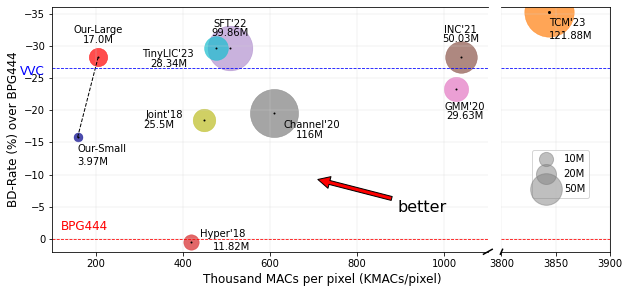

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

# Example data points with their (x, y) coordinates, labels, and sizes for bubbles
# y 负号向上，正号向下 x 负号向左，正号向右
data_points = [
    {"x": 418, "y": 0.434, "name": "Hyper'18", "Para": 11.82, "color": (0.83921569, 0.15294118, 0.15686275, 1.0), "alpha": 0.7, "para_xshift": 50, "para_yshift": 0, "M_xshift": 20, "M_yshift": -2, "ha_loc": "left", "va_loc": "top"},

    {"x": 449, "y": -18.50, "name": "Joint'18", "Para": 25.5, "color": (0.7372549, 0.74117647, 0.13333333, 1.0), "alpha": 0.7, 
    "para_xshift": -140, "para_yshift": 0, "M_xshift": -135, "M_yshift": -1.5, "ha_loc": "left", "va_loc": "top"},

    {"x": 610, "y": -19.50, "name": "Channel'20", "Para": 116, "color": (0.49803922, 0.49803922, 0.49803922, 1.0), "alpha": 0.7,
   "para_xshift": 50, "para_yshift": 2.5, "M_xshift": 20, "M_yshift": 1, "ha_loc": "left", "va_loc": "top"},

    {"x": 1027, "y": -23.31, "name": "GMM'20", "Para": 29.63, "color": (0.89019608, 0.46666667, 0.76078431, 1.0), "alpha": 0.7 ,
    "para_xshift": 20, "para_yshift": 3.5, "M_xshift": 20, "M_yshift": 2, "ha_loc": "center", "va_loc": "top"},

    {"x": 1038, "y": -28.27, "name": "INC'21", "Para": 50.03, "color": (0.54901961, 0.3372549, 0.29411765, 1.0), "alpha": 0.7 ,
    "para_xshift": 0, "para_yshift": -3.5, "M_xshift": 0, "M_yshift": -5, "ha_loc": "center", "va_loc": "top"},

    {"x": 509, "y": -29.72, "name": "SFT'22", "Para": 99.86, "color": (0.58039216, 0.40392157, 0.74117647, 1.0), "alpha": 0.5 ,
    "para_xshift": 0, "para_yshift": -3, "M_xshift": 0, "M_yshift": -4.5, "ha_loc": "center", "va_loc": "top"},

    # {"x": 833, "y": -24.52, "name": "ELIC'22", "Para": 33.79, "color": (0.17254902, 0.62745098, 0.17254902, 1.0), "alpha": 0.7 ,
    # "para_xshift": 0, "para_yshift": -2.5, "M_xshift": 0, "M_yshift": -4, "ha_loc": "center", "va_loc": "top"},

    {"x": 475.7, "y": -29.67, "name": "TinyLIC'23", "Para": 28.34, "color": (0.09019608, 0.74509804, 0.81176471, 1.0), "alpha": 0.7 ,
    "para_xshift": -150, "para_yshift": 1.7, "M_xshift": -170, "M_yshift": 0.2, "ha_loc": "left", "va_loc": "top"},

    {"x": 205.08, "y": -28.20, "name": "Our-Large", "Para": 17.0, "color": "r", "alpha": 0.7 ,
    "para_xshift": 0, "para_yshift": -3.5, "M_xshift": 0, "M_yshift": -5, "ha_loc": "center", "va_loc": "top"},

    # {"x": 173, "y": -13.12, "name": "Our-Middle", "Para": 5.79, "color": "magenta", "alpha": 0.7 ,
    # "para_xshift": 40, "para_yshift": 0, "M_xshift": 35, "M_yshift": -1.5, "ha_loc": "left", "va_loc": "top"},

    {"x": 157.93, "y": -15.76, "name": "Our-Small", "Para": 3.97, "color": "darkblue", "alpha": 0.7 ,
    "para_xshift": 0, "para_yshift": 3, "M_xshift": 0, "M_yshift": 1, "ha_loc": "left", "va_loc": "top"},

    {"x": 3843.68, "y": -35.26, "name": "TCM'23", "Para": 121.88, "color": (1.0, 0.49803922, 0.05490196, 1.0), "alpha": 0.7,
    "para_xshift": 0, "para_yshift": 3, "M_xshift": 0, "M_yshift": 1, "ha_loc": "left", "va_loc": "top"}
]


# # Create the plot
# fig, ax = plt.subplots()
# 创建两个横向的子图
# fig, (ax1, ax2) = plt.subplots(1, 2)
fig = plt.figure(figsize=(10, 4.5))
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1])  # 第一个子图是第二个子图的3倍宽

# 创建子图
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

# 隐藏两个子图之间的空间
fig.subplots_adjust(wspace=0.05)

# Define a scale factor for bubble sizes
scale_factor = 20

# Add data points
for point in data_points:
    if point["x"] <= 1100:
        bubble_size = point["Para"]  * scale_factor
        ax1.scatter(point["x"], point["y"], s=bubble_size, alpha=point["alpha"], color=point["color"], marker='o', linewidth=0.5)
        ax1.plot(point["x"], point["y"], marker='o', color='black', markersize=1)  # Adding a center marker
    else:
        bubble_size = point["Para"]  * scale_factor
        ax2.scatter(point["x"], point["y"], s=bubble_size, alpha=point["alpha"], color=point["color"], marker='o', linewidth=0.5)
        ax2.plot(point["x"], point["y"], marker='o', color='black', markersize=2)


# Annotate the data points
for point in data_points:
    if point["x"] <= 1100:
        ax1.text(point["x"] + point["M_xshift"], point["y"] + point["M_yshift"], point["name"], fontsize=10, ha=point["ha_loc"], va=point["va_loc"])
        ax1.text(point["x"] + point["para_xshift"], point["y"] + point["para_yshift"], str(point["Para"]) + 'M', fontsize=10, ha=point["ha_loc"], va=point["va_loc"])
    else:
        ax2.text(point["x"] + point["M_xshift"], point["y"] + point["M_yshift"], point["name"], fontsize=10, ha=point["ha_loc"], va=point["va_loc"])
        ax2.text(point["x"]+ point["para_xshift"], point["y"] + point["para_yshift"], str(point["Para"]) + 'M', fontsize=10, ha=point["ha_loc"], va=point["va_loc"])
    

# 断裂标志
# kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
# ax1.plot((1, 1), (-0.05, 1.05), **kwargs)
# kwargs.update(transform=ax2.transAxes)
# ax2.plot((0, 0), (-0.05, 1.05), **kwargs)
d = .010  # 斜线长度
ax1.plot((1-d, 1+d), (-d, +d), color='k', transform=ax1.transAxes, clip_on=False)
ax2.plot((-d, +d), (-d, +d), color='k', transform=ax2.transAxes, clip_on=False)
ax1.plot([157.93, 205.08], [-15.76, -28.20], 
             color='black', linewidth=1, linestyle='--')

y_value = -26.61
ax1.axhline(y=y_value, color='blue', linestyle='--', linewidth=0.8)
ax1.text(25, -25 , "VVC", fontsize=12, ha='left', va='bottom', color='blue')
ax2.axhline(y=y_value, color='blue', linestyle='--', linewidth=0.8)
# ax2.text(10, y_value, "VVC", fontsize=10, ha='left', va='bottom', color='blue')


y_value = 0
ax1.axhline(y=y_value, color='red', linestyle='--', linewidth=0.8)
ax1.text(120, -1 , "BPG444", fontsize=12, ha='left', va='bottom', color='red')
ax2.axhline(y=y_value, color='red', linestyle='--', linewidth=0.8)
# ax2.text(10, y_value, "VVC", fontsize=10, ha='left', va='bottom', color='blue')

ax1.grid(which='major', linestyle='-', linewidth=0.3, color='lightgray')
ax2.grid(which='major', linestyle='-', linewidth=0.3, color='lightgray')

# Create legend for bubble sizes
legend_bubble_sizes = [10, 20, 50]
for size in legend_bubble_sizes:
    ax2.scatter([], [], s=size * scale_factor, color='gray', alpha=0.5, label=str(size) + 'M')
    ax2.plot([], [], marker='o', color='black', markersize=10)  # Adding a center marker

# Add the legend for bubble sizes
# ax1.legend(loc='lower right', ncol=len(legend_bubble_sizes))
ax2.legend(loc='lower right', bbox_to_anchor=(0.85, 0.2))

# 设置X轴和Y轴的范围
ax1.set_xlim([100, 1100])
ax2.set_xlim(3800, 3900)  # 离群值

ax1.set_ylim([-36, 2])
ax2.set_ylim([-36, 2])
ax1.invert_yaxis()
ax2.invert_yaxis()

# 隐藏第二个子图的 y 轴刻度标签
ax2.set_yticklabels([])

# 隐藏第一个子图的右边框和第二个子图的左边框
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

# 由于我们隐藏了第二个子图的左边框，我们也需要隐藏左边的刻度线
ax2.yaxis.set_ticks_position('none') 

# Set the axis labels
# ax1.set_xlabel('Thousand MACs per pixel (KMACs/pixel)')
ax1.set_ylabel('BD-Rate (%) over BPG444', fontsize=12)

fig.text(0.5, 0.04, 'Thousand MACs per pixel (KMACs/pixel)', ha='center', va='center', fontsize=12)

# Set the title of the plot
# ax.set_title('Comparison of Image Compression Methods')

# Remove the legend if you don't want to show the labels in the corner
# ax.legend()

ax1.annotate('better', xy=(0.6, 0.3), xycoords='axes fraction', xytext=(0.85, 0.15),
            arrowprops=dict(facecolor='red', shrink=0.05),
            fontsize=16, ha='center', va='bottom')



plt.savefig('../out_figure/rd-c-clic.pdf', dpi=300, bbox_inches='tight', pad_inches=0.05)

plt.show()

In [5]:
import numpy as np
import scipy.interpolate
import pandas as pd

import os
import json


# piecewise = 0 (默认设置):
# 函数使用三次多项式拟合来近似RD曲线，然后在这个拟合曲线上计算积分。这种方法在RD曲线相对平滑且没有太多尖锐的转折点时效果较好。它依赖于多项式拟合能够准确捕捉RD曲线的整体趋势。
# 这种方法在数据点比较稀疏或者当RD曲线比较规则（例如，没有突变或不规则波动）时效果更好。

# piecewise = 1:
# 当 piecewise 设置为 1 时，函数使用分段三次Hermite插值(PCHIP)来近似RD曲线，并在这个插值曲线上使用梯形法则计算积分。PCHIP插值是一种保持单调性的方法，它可以更好地处理RD曲线上的突变和不规则性。
# 这种方法适用于RD曲线在某些区域有尖锐转折或者更加复杂和非线性的情况。它能更准确地适应数据的局部变化，特别是在数据点较多且分布不均匀时。

def BD_PSNR(R1, PSNR1, R2, PSNR2, piecewise=0):
    lR1 = np.log(R1)
    lR2 = np.log(R2)

    p1 = np.polyfit(lR1, PSNR1, 3)
    p2 = np.polyfit(lR2, PSNR2, 3)

    # integration interval
    min_int = max(min(lR1), min(lR2))
    max_int = min(max(lR1), max(lR2))

    # find integral
    if piecewise == 0:
        p_int1 = np.polyint(p1)
        p_int2 = np.polyint(p2)

        int1 = np.polyval(p_int1, max_int) - np.polyval(p_int1, min_int)
        int2 = np.polyval(p_int2, max_int) - np.polyval(p_int2, min_int)
    else:
        # See https://chromium.googlesource.com/webm/contributor-guide/+/master/scripts/visual_metrics.py
        lin = np.linspace(min_int, max_int, num=100, retstep=True)
        interval = lin[1]
        samples = lin[0]
        v1 = scipy.interpolate.pchip_interpolate(np.sort(lR1), np.sort(PSNR1), samples)
        v2 = scipy.interpolate.pchip_interpolate(np.sort(lR2), np.sort(PSNR2), samples)
        # Calculate the integral using the trapezoid method on the samples.
        int1 = np.trapz(v1, dx=interval)
        int2 = np.trapz(v2, dx=interval)

    # find avg diff
    avg_diff = (int2-int1)/(max_int-min_int)

    return avg_diff


def BD_RATE(R1, PSNR1, R2, PSNR2, piecewise=0):
    lR1 = np.log(R1)
    lR2 = np.log(R2)

    # rate method
    p1 = np.polyfit(PSNR1, lR1, 3)
    p2 = np.polyfit(PSNR2, lR2, 3)

    # integration interval
    min_int = max(min(PSNR1), min(PSNR2))
    max_int = min(max(PSNR1), max(PSNR2))

    # find integral
    if piecewise == 0:
        p_int1 = np.polyint(p1)
        p_int2 = np.polyint(p2)

        int1 = np.polyval(p_int1, max_int) - np.polyval(p_int1, min_int)
        int2 = np.polyval(p_int2, max_int) - np.polyval(p_int2, min_int)
    else:
        lin = np.linspace(min_int, max_int, num=100, retstep=True)
        interval = lin[1]
        samples = lin[0]
        v1 = scipy.interpolate.pchip_interpolate(np.sort(PSNR1), np.sort(lR1), samples)
        v2 = scipy.interpolate.pchip_interpolate(np.sort(PSNR2), np.sort(lR2), samples)
        # Calculate the integral using the trapezoid method on the samples.
        int1 = np.trapz(v1, dx=interval)
        int2 = np.trapz(v2, dx=interval)

    # find avg diff
    avg_exp_diff = (int2-int1)/(max_int-min_int)
    avg_diff = (np.exp(avg_exp_diff)-1)*100
    return avg_diff


def read_csv_data(csv_file):
    data = pd.read_csv(csv_file)
    return data.iloc[:, 0].values, data.iloc[:, 1].values

def calculate_bd_rate_for_directory(directory, piecewise=0, anchor=None, output_json='bd_rate_results.json'):
    files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    rates_and_psnrs = {file: read_csv_data(os.path.join(directory, file)) for file in files}

    if anchor and anchor in rates_and_psnrs:
        anchor_R, anchor_PSNR = rates_and_psnrs[anchor]
    else:
        raise ValueError("Anchor file not found or not specified correctly.")

    results = {}
    for file, (R, PSNR) in rates_and_psnrs.items():
        if file != anchor:
            bd_rate = BD_RATE(anchor_R, anchor_PSNR, R, PSNR, piecewise)
            results[f"{anchor} vs {file}"] = {
                "anchor": anchor,
                "comparison_file": file,
                "BD-Rate": bd_rate
            }

    with open(output_json, 'w') as outfile:
        json.dump(results, outfile, indent=4)

    return results


calculate_bd_rate_for_directory('../data/tecnick/', piecewise=0, anchor='BPG444.csv', output_json='../data/tecnick/results.json')




{'BPG444.csv vs Medium.csv': {'anchor': 'BPG444.csv',
  'comparison_file': 'Medium.csv',
  'BD-Rate': -23.836783656385517},
 'BPG444.csv vs TCSVT24.csv': {'anchor': 'BPG444.csv',
  'comparison_file': 'TCSVT24.csv',
  'BD-Rate': -31.930381610352587},
 "BPG444.csv vs SFT'22.csv": {'anchor': 'BPG444.csv',
  'comparison_file': "SFT'22.csv",
  'BD-Rate': -27.34362521935395},
 'BPG444.csv vs Small.csv': {'anchor': 'BPG444.csv',
  'comparison_file': 'Small.csv',
  'BD-Rate': -11.881028894404121},
 "BPG444.csv vs TCM'23.csv": {'anchor': 'BPG444.csv',
  'comparison_file': "TCM'23.csv",
  'BD-Rate': -31.16415716311205},
 "BPG444.csv vs Hyper'18.csv": {'anchor': 'BPG444.csv',
  'comparison_file': "Hyper'18.csv",
  'BD-Rate': 3.6260296213455057},
 "BPG444.csv vs Joint'18.csv": {'anchor': 'BPG444.csv',
  'comparison_file': "Joint'18.csv",
  'BD-Rate': -14.195570864965024},
 "BPG444.csv vs INC'21.csv": {'anchor': 'BPG444.csv',
  'comparison_file': "INC'21.csv",
  'BD-Rate': -26.81085535851023},
 'BP